In [1]:
import geopandas as gpd

wse_gdf = gpd.read_file(r"Z:\js\ResMap\py\output\May 2021\tempfiles\ogr\ras_wse.shp")


In [2]:
wse_gdf.crs

<Projected CRS: EPSG:3451>
Name: NAD83 / Louisiana North (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Louisiana - counties of Avoyelles; Bienville; Bossier; Caddo; Caldwell; Catahoula; Claiborne; Concordia; De Soto; East Carroll; Franklin; Grant; Jackson; La Salle; Lincoln; Madison; Morehouse; Natchitoches; Ouachita; Rapides; Red River; Richland; Sabine; Tensas; Union; Vernon; Webster; West Carroll; Winn.
- bounds: (-94.05, 30.85, -90.86, 33.03)
Coordinate Operation:
- name: SPCS83 Louisiana North zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [3]:
wse_bounds = r"Z:\Z GIS\Greenbelt\Greenbelt\boundary_simple_10ft.shp"
tooltip_dir = r'Z:\js\ResMap\data\greenbelt\tooltip_layers'
forecast = 'Greenbelt_May2021'


In [4]:
# Project to 4326
# wse_gdf.to_crs(epsg=3857, inplace=True)

In [5]:
# Compute depth as [max_wse - min_elev]
wse_gdf['depth_max'] = wse_gdf['wse_max'] - wse_gdf['min_elev']
wse_gdf['depth_max'] = wse_gdf['depth_max'].round(2)

In [6]:
# Subset to only rows with depth_max > 0
tooltip_gdf = wse_gdf[wse_gdf['depth_max'] > 0]

In [ ]:
# Clip to wse_bounds
wse_bounds_gdf = gpd.read_file(wse_bounds)


In [ ]:
wse_bounds_gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

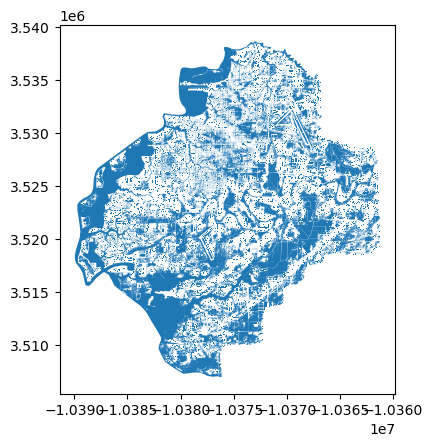

In [ ]:
wse_bounds_gdf.plot()

<Axes: >

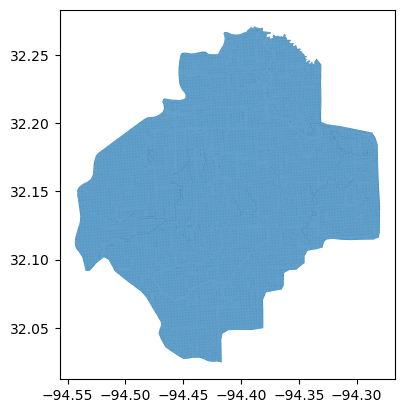

In [ ]:
tooltip_gdf.plot()

In [ ]:
tooltip_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

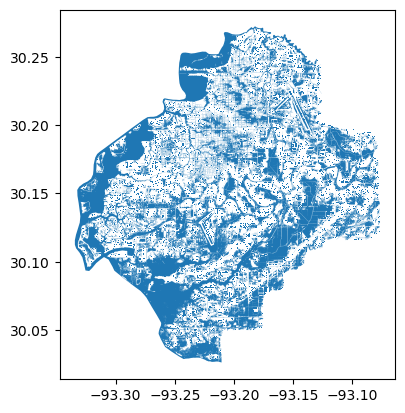

In [ ]:
wse_bounds_gdf.to_crs(epsg=4326, inplace=True)
wse_bounds_gdf.plot()

In [ ]:
tooltip_clip_gdf = gpd.clip(tooltip_gdf, wse_bounds_gdf) 

In [ ]:
import os 

# Export geoJson
# tooltip_dir = os.path.join(args.datadirectory, 'tooltip_layers')

if not os.path.exists(tooltip_dir):
    os.makedirs(tooltip_dir)

tooltip_clip_gdf.to_file(os.path.join(tooltip_dir, f'{forecast}_tooltip.geojson'), driver='GeoJSON')

c:\Tools\Anaconda3\envs\pyRAS\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
